¡Hola, Eduardo!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-analyst. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>

<div class="alert alert-block alert-success">
<b>Resumen de la revisión 1</b> <a class="tocSkip"></a>

Hola, Eduardo! Tu trabajo es excelente, solo te hice un par de recomendaciones mínimas para mejorar algunas visualizaciones y te dejé un comentario acerca de un filtro que te faltó para usar los datos requeridos en la prueba de hipótesis. Una vez hayas atendido este último comentario principalmente, tu proyecto quedará aprobado. Quedo pendiente de tus dudas y comentarios.
</div>

## Importar los archivos

In [18]:
import pandas as pd

# Cargar los datasets
df_taxis = pd.read_csv('/datasets/project_sql_result_01.csv')
df_drops = pd.read_csv('/datasets/project_sql_result_04.csv')

# Mostrar las primeras filas de ambos datasets para revisar su contenido
print(df_taxis.head())
print(df_drops.head())

                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                Medallion Leasing         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299
  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000


<div class="alert alert-block alert-success">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con la carga de la información y las librerias necesarias para el análisis.

## Estudiar los datos que contienen

In [19]:
#Validar duplicados
print(df_taxis.duplicated().sum())
print(df_drops.duplicated().sum())

# Comprobar la información de los datasets
print(df_taxis.info())
print(df_drops.info())

0
0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
None


- df_taxis tiene dos columnas: company_name (nombre de la empresa) y trips_amount (número de viajes).

- df_drops tiene dos columnas: dropoff_location_name (nombre del barrio) y average_trips (promedio de viajes por barrio).

<div class="alert alert-block alert-danger">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Solamente en estos análisis iniciales te recomiendo verificar registros duplicados


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con el ajuste!

## Asegurarte de que los tipos de datos sean correctos



In [20]:
# Verificar los tipos de datos en ambos datasets
print(df_taxis.dtypes)
print(df_drops.dtypes)

company_name    object
trips_amount     int64
dtype: object
dropoff_location_name     object
average_trips            float64
dtype: object


- Viendo el contexto de cada columna los datos y tipos de datos son correctos, con la obsevación de que en el campo "trips_amount" del dataframe "df_1" comunmente debe ser de tipo flotante sin embargo los datos no presentan ningún decimal por lo que se pude trabajsr de esta manera.

## Identificar los 10 principales barrios en términos de finalización

In [21]:
# Ordenamos por el promedio de viajes en los barrios y seleccionamos los 10 principales
top_10_drops = df_drops.sort_values(by='average_trips', ascending=False).head(10)

# Mostrar los 10 barrios principales
print(top_10_drops)

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


## Hacer gráficos: empresas de taxis y número de viajes, los 10 barrios principales por número de finalizaciones

<Figure size 1200x800 with 0 Axes>

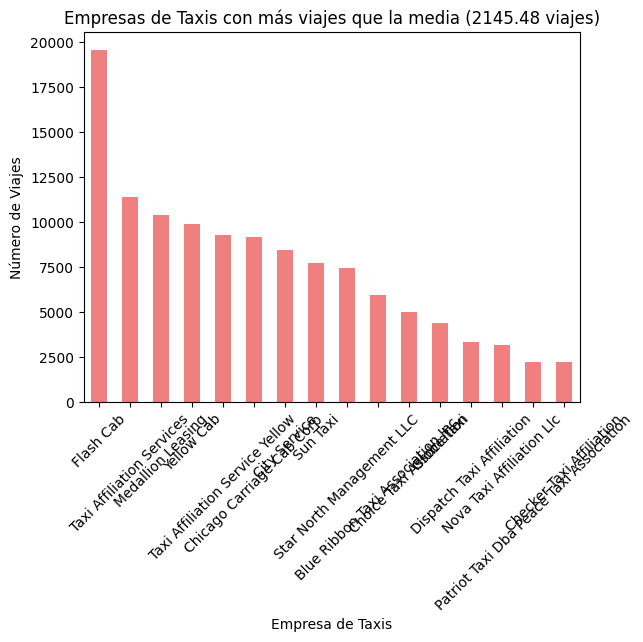

In [22]:
import matplotlib.pyplot as plt

# Calculamos la media de los viajes por empresa
mean_trips = df_taxis['trips_amount'].mean()

# Filtramos las empresas que tienen más viajes que la media
df_filtered = df_taxis[df_taxis['trips_amount'] > mean_trips]

# Visualizamos las empresas que tienen más viajes que la media en un gráfico de barras
plt.figure(figsize=(12, 8))
df_filtered.sort_values(by='trips_amount', ascending=False).plot(kind='bar', x='company_name', y='trips_amount', color='lightcoral', legend=False)
plt.title(f'Empresas de Taxis con más viajes que la media ({mean_trips:.2f} viajes)')
plt.xlabel('Empresa de Taxis')
plt.ylabel('Número de Viajes')
plt.xticks(rotation=45)
plt.show()

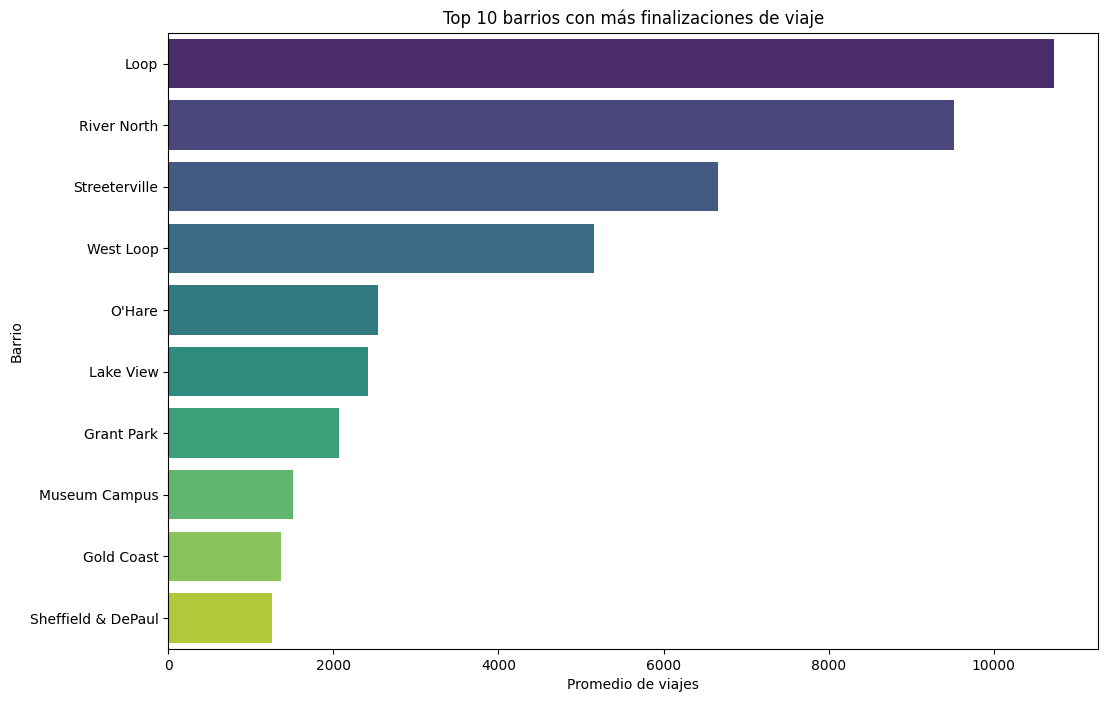

In [23]:
import seaborn as sns

# Gráfico de los 10 barrios principales por número de finalizaciones de viaje
plt.figure(figsize=(12, 8))
sns.barplot(x='average_trips', y='dropoff_location_name', data=top_10_drops, palette='viridis')
plt.title('Top 10 barrios con más finalizaciones de viaje')
plt.xlabel('Promedio de viajes')
plt.ylabel('Barrio')
plt.show()

<div class="alert alert-block alert-success">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con en el desarrollo de las dos gráficas para mostrar los resultados. 

## Sacar conclusiones basadas en cada gráfico y explicar los resultados

- Gráfico 1: Empresas de taxis y número de viajes:

Conclusión: El gráfico muestra qué empresas de taxis tienen más viajes que la media. Las empresas que superan el promedio probablemente tienen una mayor participación de mercado, lo que puede estar relacionado con su tamaño, flota de vehículos o eficiencia.

- Gráfico 2: Los 10 barrios principales por número de finalizaciones:

Conclusión: El gráfico de barrios revela cuáles son los más populares para finalizar los viajes. Los barrios con un mayor número de finalizaciones pueden estar más cerca de áreas de alto tráfico, centros comerciales o zonas turísticas.

## "La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos".

Establece el valor del nivel de significación (alfa) por tu cuenta.

In [24]:
# Cargar el dataset de los viajes desde el Loop hasta el Aeropuerto O'Hare
df_weather = pd.read_csv('/datasets/project_sql_result_07.csv')

df_weather.info()
print(df_weather.head())

print(df_weather['weather_conditions'].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB
              start_ts weather_conditions  duration_seconds
0  2017-11-25 16:00:00               Good            2410.0
1  2017-11-25 14:00:00               Good            1920.0
2  2017-11-25 12:00:00               Good            1543.0
3  2017-11-04 10:00:00               Good            2512.0
4  2017-11-11 07:00:00               Good            1440.0
['Good' 'Bad']


In [25]:
# Separar sábados lluviosos y no lluviosos
rainy_saturdays = df_weather[df_weather['weather_conditions'] == 'Bad']['duration_seconds']
dry_saturdays = df_weather[df_weather['weather_conditions'] == 'Good']['duration_seconds']

# Verificar tamaños de muestra
print("Cantidad de sábados lluviosos:", len(rainy_saturdays))
print("Cantidad de sábados no lluviosos:", len(dry_saturdays))

Cantidad de sábados lluviosos: 180
Cantidad de sábados no lluviosos: 888


# Asumimos que 'Bad' representa lluvia
rainy_saturdays = df_saturdays[df_saturdays['weather_conditions'] == 'Bad']['duration_seconds']
dry_saturdays = df_saturdays[df_saturdays['weather_conditions'] == 'Good']['duration_seconds']

Un valor comúnmente aceptado para el nivel de significación es α = 0.05 (5%).
Esto significa que estamos dispuestos a aceptar un 5% de probabilidad de rechazar la hipótesis nula cuando en realidad es cierta (error tipo I).

Decisión: Elegimos α = 0.05 porque es un estándar estadístico razonable para pruebas de hipótesis en análisis exploratorios como este.

## Cómo planteaste las hipótesis nula y alternativa

# Definimos nuestras hipótesis:

- Queremos comparar la duración promedio de los viajes en sábados lluviosos frente a otros sábados (no lluviosos). La variable relevante aquí es duration_seconds.

- Hipótesis nula (H₀):

La duración promedio de los viajes los sábados no cambia cuando llueve.

- Hipótesis alternativa (H₁):

La duración promedio de los viajes los sábados sí cambia cuando llueve.

Tipo de prueba: es una prueba bilateral (two-tailed) porque queremos detectar cualquier diferencia, ya sea que aumente o disminuya la duración promedio.


In [26]:
from scipy import stats

# Welch's t-test
t_stat, p_value = stats.levene(rainy_saturdays, dry_saturdays)

print("Estadístico t:", t_stat)
print("Valor p:", p_value)

# Interpretar el resultado
alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipótesis nula: las varianzas son diferentes.")
else:
    print("No se puede rechazar la hipótesis nula: las varianzas son similares.")

Estadístico t: 0.38853489683656073
Valor p: 0.5332038671974493
No se puede rechazar la hipótesis nula: las varianzas son similares.


In [27]:
#Las varianzas al ser similares se aplica la prueba de ttest validando sus supuestos

from scipy import stats

# Welch's t-test
t_stat, p_value = stats.ttest_ind(rainy_saturdays, dry_saturdays, equal_var=False)

print("Estadístico t:", t_stat)
print("Valor p:", p_value)

# Interpretar el resultado
alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipótesis nula: la duración promedio cambia los sábados lluviosos.")
else:
    print("No se puede rechazar la hipótesis nula: no hay evidencia de que cambie la duración promedio.")


Estadístico t: 7.186034288068629
Valor p: 6.738994326108734e-12
Rechazamos la hipótesis nula: la duración promedio cambia los sábados lluviosos.


 <div class="alert alert-block alert-danger">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Para esta prueba te recomiendo hacer una prueba de  Levene  para mostrar si las varianzas son iguales y agregarlo dentro de la función. Actualmente lo colocas como equal_var=False. Para esto, primero debes calcular las varianzas para cada uno de los días (lluvioso y no lluvioso) debes de hacer uso de la siguiente función:
    
    levene(rainy_saturdays, dry_saturdays)
    
Adoptaremos un nivel de significancia de 0.05; si el valor p resultante es mayor a 0.05, no podemos rechazar la hipótesis nula, y si es menor a 0.05, rechazamos la hipótesis nula, indicando que las varianzas no son iguales.
    
Solamente recuerda que la prueba de levene no es sustituto a la prueba de st.ttest_ind, más bien es complemento para saber que colocar dentro del elemento "equal_var".  Es por eso que para terminar la prueba debes de realizar la prueba de st.ttest_ind considernado el resultado de la prueba realizada de levene.  
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con el ajuste! Sigue disfrutando los siguientes cursos

## Qué criterio usaste para probar las hipótesis y por qué

Criterio: Prueba de hipótesis para la diferencia de medias — prueba t de Student (t-test)
Usamos una prueba t para muestras independientes porque:

Queremos comparar dos grupos independientes:

Viajes en sábados lluviosos (weather_conditions == 'Bad')

Viajes en sábados no lluviosos (weather_conditions == 'Good')

La variable de interés (duration_seconds) es cuantitativa continua.

El tamaño de la muestra no es enorme, así que no asumimos que la población tiene distribución normal exacta, pero la t de Student es robusta si las muestras son razonablemente grandes y/o no muy sesgadas.

<div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Eduardo, en general, considero que realizaste un excelente trabajo con el proyecto. Lograste limpiar y organizar las bases de datos eficazmente. Además, tu análisis exploratorio fue exhaustivo, presentando resultados relevantes que serán muy útiles para la toma de decisiones. También, desarrollaste las pruebas de hipótesis de manera acertada. Sin embargo, siempre hay espacio para mejorar y quisiera señalar algunos aspectos que podrías considerar:



        
    
*  Considerar desarrollar un análisis para comprobar los supuestos de la prueba de hipótesis (varianzas iguales)
    
    